In [107]:
#Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading Data

In [2]:
# File used during Part 2.5 (Basic EDA) since it already filtered out
# movies that have a revenue and budget > 0
df = pd.read_csv('Data/tmdb_results_combined.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,1956.0,PG
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4106.0,G
3,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.108,5448.0,PG-13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5168 non-null   object 
 1   adult                  5168 non-null   float64
 2   backdrop_path          4953 non-null   object 
 3   belongs_to_collection  1141 non-null   object 
 4   budget                 5168 non-null   float64
 5   genres                 5168 non-null   object 
 6   homepage               2452 non-null   object 
 7   id                     5168 non-null   float64
 8   original_language      5168 non-null   object 
 9   original_title         5168 non-null   object 
 10  overview               5160 non-null   object 
 11  popularity             5168 non-null   float64
 12  poster_path            5134 non-null   object 
 13  production_companies   5168 non-null   object 
 14  production_countries   5168 non-null   object 
 15  rele

In [4]:
# dropping all rows with nans to avoid skewing the data during hypothesis testing
df = df.dropna(subset = ['certification'])

# Answering Stakeholder Questions with Hypothesis Testing

## Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

### Hypotheses

- **Null Hypothesis**: Different MPAA ratings all generate the same amount of revenue on average.

- **Alternative Hypothesis**: Different MPAA ratings generate revenue at significantly different amounts.
- Alpha: .05

### Separating and Defining Our Groups

In [5]:
#dropping NR and NC-17
values = ['NR', 'NC-17']
df = df[df.certification.isin(values) == False]

In [6]:
#Creating a group dictionary
groups = {}
# Looping through all unique categories
for i in df['certification'].unique():
    # Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

### Checking Assumptions

#### Outliers

- Unsure how to loop through to remove outliers

#### Normality

In [7]:
## Running normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    
    ## Use stats.normaltest for samples > 20
    if len(data) >= 15:
        stat, p = stats.normaltest(data)
        
    ## Use stats.shapiro for samples < 20
    else:
        stat, p = stats.shapiro(data)
        
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,528.0,2.922066e-62,283.375970
R,1730.0,0.000000e+00,1442.690580
G,88.0,1.655291e-13,58.859259
PG-13,1454.0,4.040370e-269,1235.998108


In [8]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,528.0,2.922066e-62,283.375970,True
R,1730.0,0.000000e+00,1442.690580,True
G,88.0,1.655291e-13,58.859259,True
PG-13,1454.0,4.040370e-269,1235.998108,True


- None of the groups have a normal distribution, but since the sample sizes are all larger than 20 we can ignore this assumption.

#### Equal Variance

In [9]:
stats.levene(*groups.values())

LeveneResult(statistic=71.4033653887217, pvalue=6.418997812246123e-45)

- The groups do not have equal variance, so we will use stats.kruskal.

### Kruskal Test

In [10]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=423.8223485498064, pvalue=1.53002826449322e-91)

### Conclusion

- Since our p-value for the Kruskal test is < .05, we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in revenue generation between different MPAA ratings. To find out which specific ratings are significantly different, we will perform a Tukey pairwise comparison test.

In [11]:
## saving the values as revenue and the labels to the certification
values = df['revenue']
labels = df['certification']

## performing tukey's multiple comparison test and displaying the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,14717034.5341,0.9216,-45088324.6546,74522393.7228,False
G,PG-13,-8865563.8686,0.9784,-65885495.4502,48154367.713,False
G,R,-110356456.8848,0.0,-167116222.858,-53596690.9116,True
PG,PG-13,-23582598.4027,0.099,-49973893.625,2808696.8196,False
PG,R,-125073491.4189,0.0,-150897877.1671,-99249105.6707,True
PG-13,R,-101490893.0162,0.0,-119970354.8362,-83011431.1962,True


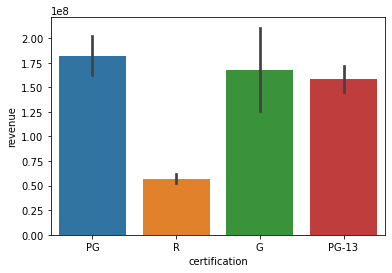

In [12]:
sns.barplot(data=df, x='certification',y='revenue');

- Based on these results, we can see that there is a significant difference between G and R rated movies, between PG and R rated movies, and between PG-13 and R rated movies. In combination with the barplot, it is clear that R rated movies generate significantly lower revenue than the rest.

## Q2: Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

### Hypotheses

- **Null Hypothesis**: There is no difference in revenue between movies that are over 2.5 hours long and movies that are 1.5 hours or less.

- **Alernative Hypothesis**: There is a significant difference in revenue earned between movies that are over 2.5 hours long and movies that are 1.5 hours or less.

- Alpha: .05


### Separating and Defining Our Groups

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

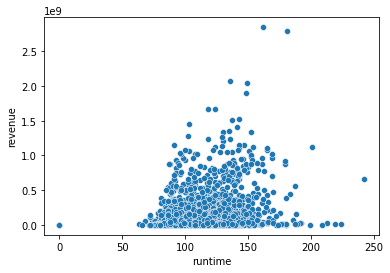

In [13]:
sns.scatterplot(data=df, x='runtime',y='revenue')

In [14]:
# Adding boolean columns to see the sample size of each group
df['runtime_over_150'] = df['runtime'] > 150
df['runtime_under90'] = df['runtime'] <= 90

print(f" Movies over 150 min: \n {df['runtime_over_150'].value_counts()}")
print(f" Movies under or equal to 90 min:\n {df['runtime_under90'].value_counts()}")

 Movies over 150 min: 
 False    3688
True      112
Name: runtime_over_150, dtype: int64
 Movies under or equal to 90 min:
 False    3275
True      525
Name: runtime_under90, dtype: int64


- There are 112 movies > 2.5 hours and 525 movies <= 1.5 hours.

In [17]:
#Defining features of interest
runtime_over_rev = runtime_over['revenue']
runtime_under_rev = runtime_under['revenue']

### Checking Assumptions

#### Outliers

In [18]:
# Check for outliers in revenue for the over 2.5 hour group
zscores= stats.zscore(runtime_over_rev)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [19]:
# Check for outliers in revenue for the under 1.5 hour group
zscores= stats.zscore(runtime_under_rev)
outliers = abs(zscores)>3
np.sum(outliers)

13

In [20]:
# Removing outliers from both groups
runtime_over_rev = runtime_over_rev[(np.abs(stats.zscore(runtime_over_rev)) < 3)]
runtime_under_rev = runtime_under_rev[(np.abs(stats.zscore(runtime_under_rev)) < 3)]

#### Normality

In [21]:
# test the >2.5 group for normality
result_runtime_over_rev = stats.normaltest(runtime_over_rev)
result_runtime_over_rev

NormaltestResult(statistic=19.686330682645124, pvalue=5.31089368656761e-05)

In [22]:
# test the <=1.5 group for normality
result_runtime_under_rev = stats.normaltest(runtime_under_rev)
result_runtime_under_rev

NormaltestResult(statistic=231.7514024178276, pvalue=4.74048065124623e-51)

- The p-values for both groups are lower than our alpha of .05, which means our data is not normally distributed. However, since our sample sizes are larger than 15, so we can continue to test variance.

#### Equal Variance

In [23]:
# Test for equal variance
result = stats.levene(runtime_over_rev, runtime_under_rev)
result

LeveneResult(statistic=231.80418620322604, pvalue=1.0529928851185011e-44)

- Since our p-value is less than .05, this means that both groups do not have equal variance. This means that we need to set equal_var to False for our T-test.

### T-test

In [24]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(runtime_over_rev, runtime_under_rev, equal_var = False)
result

Ttest_indResult(statistic=7.077340883965543, pvalue=1.4108489936527082e-10)

### Conclusion

- Since our p-value is less than .05, we can reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in the revenue earned between movies over 2.5 hours long and movies that are 1.5 hours and below. 
- To see which one typically earns more or less, we can use the visual below.

In [50]:
# Filtering out those with runtime > 2.5 hours and those <= 1.5
runtime_over = df['runtime'] > 150
runtime_under = df['runtime'] <= 90

# Applying filter
df2 = df.loc[runtime_over | runtime_under, :]

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

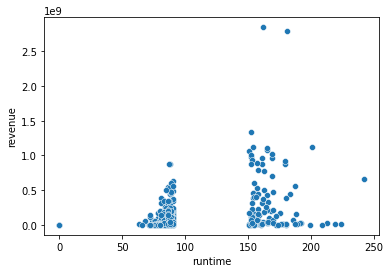

In [51]:
sns.scatterplot(data=df2, x='runtime',y='revenue')

- Based on this scatterplot, we can see that the the average revenue for the longer movies looks higher than the shorter movies.

## Q3: Do movies released in 2020 earn less revenue than movies released in 2018?

### Hypotheses:
- Null Hypothesis: There is no significant difference in revenue between movies released in 2020 and movies released in 2018.
- Alternative Hypothesis: There is a significant difference between movies released in 2020 and movies released in 2018.
- Alpha = .05

### Separating Groups

In [66]:
# Defining features
movies_2018_df = df[(df['release_date'] > '2018-01-01') & (df['release_date'] < '2019-01-01')]
movies_2020_df = df[(df['release_date'] > '2020-01-01') & (df['release_date'] < '2021-01-01')]

In [67]:
# Seeing how many samples are in each group
print(len(movies_2018_df))
print(len(movies_2020_df))

141
52


In [55]:
# Defining features
rel_2018_rev = movies_2018_df['revenue']
rel_2020_rev = movies_2020_df['revenue']

### Checking Assumptions

#### Outliers

In [56]:
# Check for outliers in revenue for 2018 group
zscores= stats.zscore(rel_2018_rev)
outliers = abs(zscores)>3
np.sum(outliers)

4

In [57]:
# Check for outliers in revenue for 2020 group
zscores= stats.zscore(rel_2020_rev)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [58]:
# remove outliers from both groups
rel_2018_rev = rel_2018_rev[(np.abs(stats.zscore(rel_2018_rev)) < 3)]
rel_2020_rev = rel_2020_rev[(np.abs(stats.zscore(rel_2020_rev)) < 3)]

#### Normality

In [59]:
# test the 2018 group for normality
result_2018 = stats.normaltest(rel_2018_rev)
result_2018

NormaltestResult(statistic=63.48196097813413, pvalue=1.6408441136216578e-14)

In [60]:
# test the 2020 group for normality
result_2020 = stats.normaltest(rel_2020_rev)
result_2020

NormaltestResult(statistic=44.224953753601135, pvalue=2.492718926601987e-10)

- Since our p-value is lower than .05 for both the groups, this means our data is not normally distributed. However, the sample size is larger than 15 for each group, so we can proceed without satisfying this assumption.

#### Equal Variance

In [61]:
# Test for equal variance
result = stats.levene(rel_2018_rev, rel_2020_rev)
result

LeveneResult(statistic=8.369053832947468, pvalue=0.004274734801434695)

- Our groups also do not have equal variance since the p-value is lower than .05, so we will set equal_var = False again.

#### T-test

In [62]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(rel_2018_rev, rel_2020_rev, equal_var = False)
result

Ttest_indResult(statistic=4.456078322932967, pvalue=1.4470275958191408e-05)

### Conclusion
- Our p-value is less than .05, so we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in revenue between movies released in 2018 and movies released in 2020.
- To see which release year had higher revenues on average, we can look at the graph below.

In [82]:
# Changing release_date to date_time for filtering
df['release_date'] = pd.to_datetime(df['release_date'].astype(str), format='%Y-%m-%d')

In [85]:
df_2018 = df[df['release_date'].dt.strftime('%Y') == '2018']
df_2020 = df[df['release_date'].dt.strftime('%Y') == '2020']

In [102]:
plot_df = pd.concat([df_2018, df_2020], axis=0)
plot_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,runtime_over_150,runtime_under90
4230,tt1667321,0.0,/lX3ag7lRucBnplL2nQiYkOyssbj.jpg,NaN,745971.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://bleeckerstreetmedia.com/onchesilbeach,391714.0,en,On Chesil Beach,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A different time. A different love.,On Chesil Beach,0.0,6.200,306.0,R,False,False
4292,tt3688342,0.0,/7b9YkqtVP8GWoksyzPgB08EcK5i.jpg,NaN,4000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 10752...",NaN,472553.0,en,Zoo,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a larger than life friendship,Zoo,0.0,6.765,85.0,PG,False,False
4360,tt5270948,0.0,/d4fWOKyrVgp3XsH0swUucl277O3.jpg,NaN,34000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",http://chappaquiddickmovie.com/,432301.0,en,Chappaquiddick,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The Untold True Story,Chappaquiddick,0.0,6.100,216.0,PG-13,False,False
4367,tt5340300,0.0,/a26Gj4TqFKEdku1XLIWLFpzUgv4.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",http://leanonpete-movie.com,407890.0,en,Lean on Pete,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can’t get anywhere on your own,Lean on Pete,0.0,6.895,263.0,R,False,False
4420,tt6053438,0.0,/b5BLqJ6pqMtziBQFd89StwvE7D8.jpg,NaN,3500000.0,"[{'id': 18, 'name': 'Drama'}]",https://a24films.com/films/first-reformed,458737.0,en,First Reformed,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,First Reformed,0.0,7.038,1102.0,R,False,False


<AxesSubplot:xlabel='release_date', ylabel='revenue'>

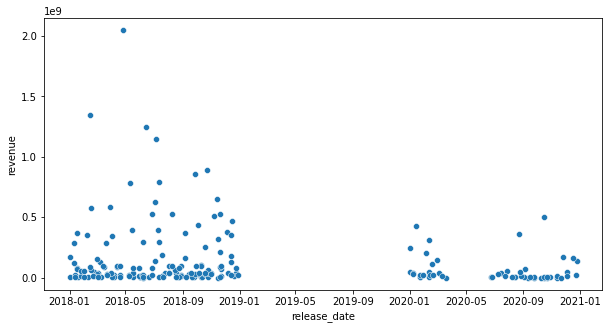

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=plot_df, x='release_date',y='revenue')

- Based on this visualization, we can see that the revenues for movies that came out in 2018 seem to be much higher than movies that came out in 2020. One speculation for the cause of this is that lock-down for Covid-19 started in early 2020, which may also explain why there is no movies released for a few months around that time.

# Questions and Comments for Purvi (If you can possibly include the answers in my assignment feedback or an email):

- I definitely know that I need to improve the visuals more if I want an employer to look at this project. I was trying to figure out a way to turn the years 2018 and 2020 into 2 separate values and then plotting the revenue for the rows that fall into those years so it becomes a barplot instead of a scatterplot. Is there a way to do that?


- How can I get the outliers for the ANOVA groups? I know I am supposed to use a loop, but I am not sure how.

- I noticed that while using this data, it was not as clean as the sql database would have been, but I was a little confused on how to load the .sql database as a dataframe and wanted to know if you had any reference for how to do that.

- Lastly, I know I need to add a readme in the future when I feel like I am fully done with this project.

Thanks in advance!